<a href="https://colab.research.google.com/github/coding-dojo-data-science/ds-fundamentals-notebooks/blob/main/Data_Visualization_Core_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Core [Starter Notebook]

## Import Packages and Load Data

In [1]:
# import the required packages 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter as fsf
import seaborn as sns

In [2]:
## Save the filepath to the data as a variable "fpath"
fpath='/Users/oliver/Desktop/datasets/insurance_mod.csv'

In [3]:
# Read in the file and disply the info and head
df=pd.read_csv(fpath)
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


None

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0


## Explore Correlation

### 1\) Correlation Heatmap

1a) Define a variable containing the correlations between variables in the insurance dataset. 

In [4]:
# Find correlations
corr=df.corr()
corr

/var/folders/w6/t6jhm8jd0pnbj_5hvcl1nlsw0000gn/T/ipykernel_5416/572761474.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299009
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067997
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299009,0.198341,0.067997,0.787251,1.000000


1b) Make a heatmap of the correlations and annote with the values.

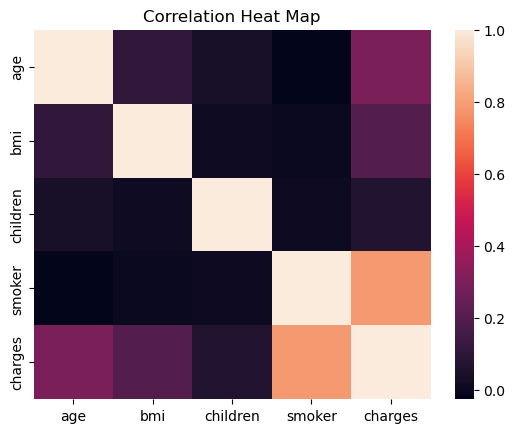

In [5]:
# Make a heatmap using the correlations from above
ax=sns.heatmap(corr);
ax.set_title('Correlation Heat Map');

1c) **Are there arny strong correlations?
Is it a positive or negative correlation?**

- Your Answer: 
  - `There are very strong negative correlations between smoker and age, bmi, and children features. There are also strong positive correlations between smoker and charges.`


## Explore Charges vs. Smokers

### 2\) Barplot - Charges for Smokers vs. Non-Smokers

2a) Make a barplot to visualize the mean of charges for smokers and nonsmokers.

smoker
0     8434.260338
1    32050.226277
Name: charges, dtype: float64


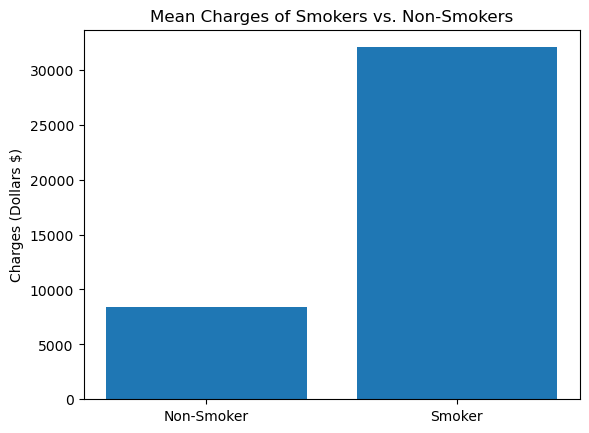

In [6]:
## Make a barplot of smoker vs charges
# creating labels
bar_labels=['Non-Smoker','Smoker']
# creating groupby
sm_ch=df.groupby('smoker')['charges'].mean()
# plotting
fig,ax=plt.subplots()
ax.bar(bar_labels,sm_ch)
ax.set(title='Mean Charges of Smokers vs. Non-Smokers',ylabel='Charges (Dollars $)',);
print(sm_ch)

2b) Is the mean of charges higher for smokers or nonsmokers? ((In a future course, you will explore how to calculate the statistical significance of this difference)

- Your Answer:
  -  `The mean of charges is higher for smokers.`

### 3\) Boxplot - Charges for Smokers vs. Non-Smokers


3a) Create a boxplot with x as smokers and y as charges. 


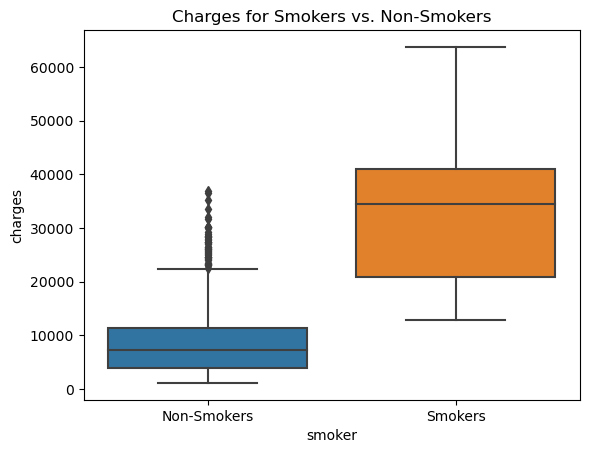

In [7]:
# creating labels
labels=['Non-Smokers','Smokers']
# plotting
ax=sns.boxplot(df,x='smoker',y='charges')
ax.set(title='Charges for Smokers vs. Non-Smokers',xticklabels=labels);


3b) What information does this include that you could not see in your bar chart?
- Answer(s): 
  - `Just how much the charges for a smoker can vary. Much of the non-smoker outliers lie in the lower to upper quartile of the smoker boxplot but there are smokers with relatively low charges.`

## Explore Charges for Males vs. Females

### 4\) Barplot - Charges for Males vs. Females

4a) Make a searborn barplot to visualize the difference in charges between males and females.

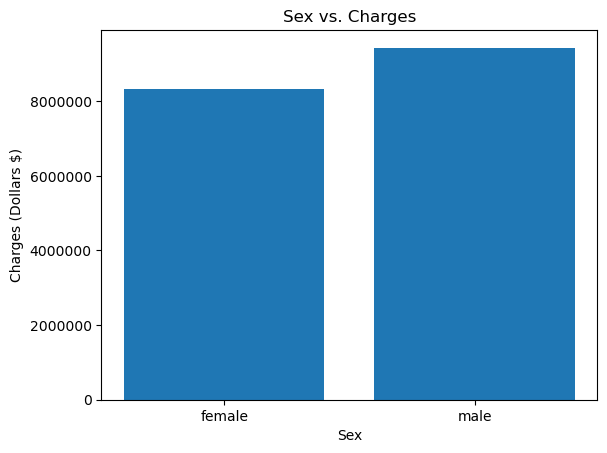

In [8]:
# Make a barplot of sex vs. charges
fig,ax=plt.subplots()
# charges
sex_charges=df.groupby('sex')['charges'].sum()
ax.bar(sex_charges.index,sex_charges.values)
ax.set(title='Sex vs. Charges',ylabel='Charges (Dollars $)',xlabel='Sex')
ax.yaxis.set_major_formatter(fsf('%.0f'))

4b)  Is the mean of charges higher for males or females?

- Your Answer:
  - `males`

### 5\) Grouped Barplot - Charges by Sex and Smoker

5a\) Create a seaborn barplot to visualize the diference between insurance charges grouped by Smoker (on the x-axis), and Sex (the hue).

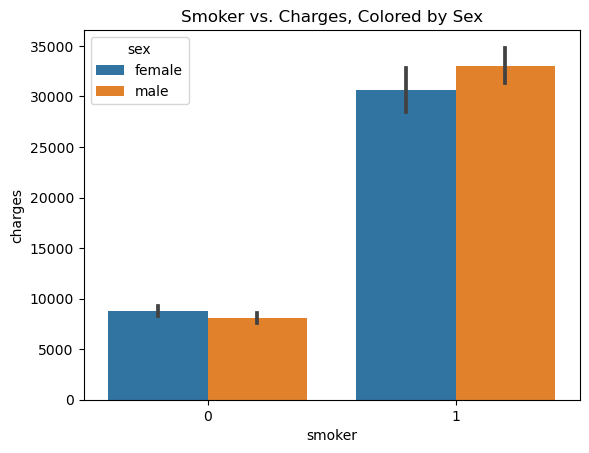

In [9]:
# Create a barplot of smoker vs charges, colored by sex
ch_sm=df.groupby('smoker')['charges'].sum()
ax=sns.barplot(data=df,x='smoker',y='charges',hue='sex');
ax.set_title('Smoker vs. Charges, Colored by Sex');

5b\) What do you observe? Which of the 4 groups has the highest average charges? 
- Your Answer:
  - `Of the 4 groups, male smokers have the highest average charges.`

## Explore Age vs. Charges

### 6\) Scatter Plot - Age vs. Charges

6a) Make a scatterplot to visualize the relationship between charges and age for the entire dataset

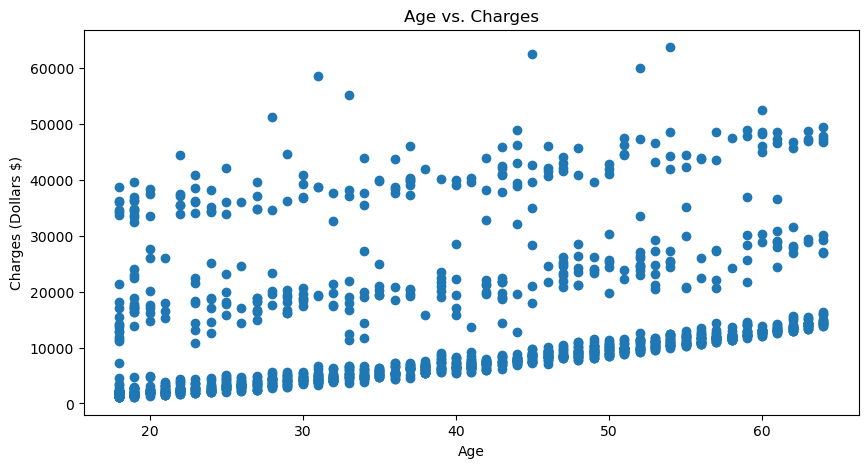

In [10]:
# Create a scatter plot of age vs charges
age=df['age']
charges=df['charges']
fig,ax=plt.subplots(figsize=[10,5])
ax.scatter(age,charges)
ax.set(title='Age vs. Charges',xlabel='Age',ylabel='Charges (Dollars $)');

6b) Desribe what you notice from the visualization.
- Your Answer:
  - `Charges increase with age.`

### 7\)  Grouped Scatter Plot - Age vs. Charges, colored by Smoker

7a) Make a scatterplot to visualize the relationship between charges and age, but colored by smoker or not.

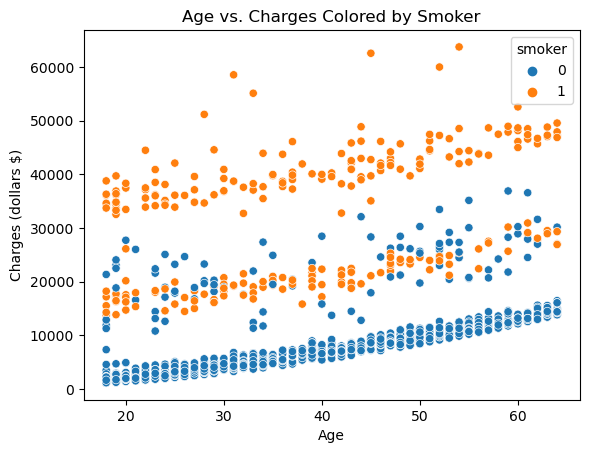

In [11]:
# make another scatterplot of age vs charges, but colored by smoker 
ax=sns.scatterplot(data=df,x=age,y=charges,hue=df['smoker'])
ax.set(title='Age vs. Charges Colored by Smoker',ylabel='Charges (dollars $)',xlabel='Age');

7b) Desribe what you notice from the visualization.

- Your Answer:
  - `Smokers have higher charges than non-smokers.`

### 8\) Grouped Scatter Plot - Age vs. Charges, colored by Sex

8a) Make a scatterplot to visualize the relationship between charges and age, but colored by sex.

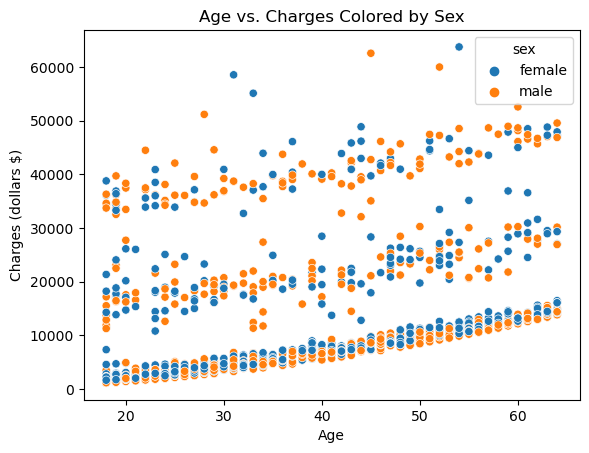

In [12]:
# make another scatterplot of charges vs age, but this time color the dots by sex
ax=sns.scatterplot(data=df,x=age,y=charges,hue='sex')
ax.set(title='Age vs. Charges Colored by Sex',ylabel='Charges (dollars $)',xlabel='Age');

8b) Describe what you notice from the visualization

- Your Answer:
  - `No significant difference between sexes.`

## Explore BMI

### 9\) Regplot - Charges vs. BMI

9a) Make a seaborn regplot to visualize the relationship between charges and bmi for the entire dataset

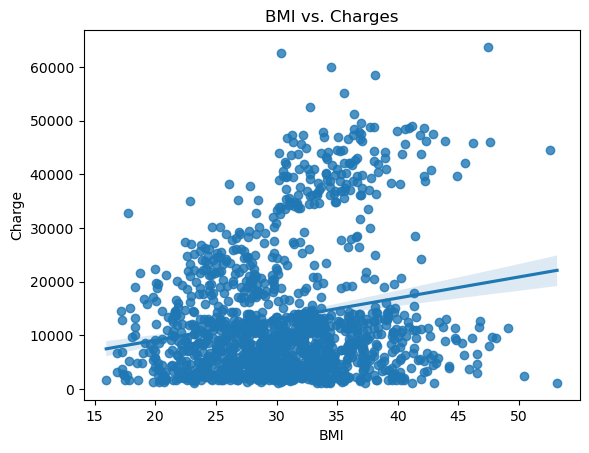

In [13]:
# Make a seaborn regplot for bmi vs. charges. 
ax=sns.regplot(data=df,x='bmi',y='charges');
ax.set(title='BMI vs. Charges',ylabel='Charge',xlabel='BMI');

9b\) What do you notice from the visualization? *(There are many correct answers.)*

- Your Answer:
  - `There is a rather slight positive correlation between charges and bmi. The highest charges belong to those with BMI of 32 to 45.`

### 10\) Scatterplot - Charges vs. BMI - Colored by Smoker

10a) Make a scatterplot to visualize the relationship between charges and bmi colored by smoker or not

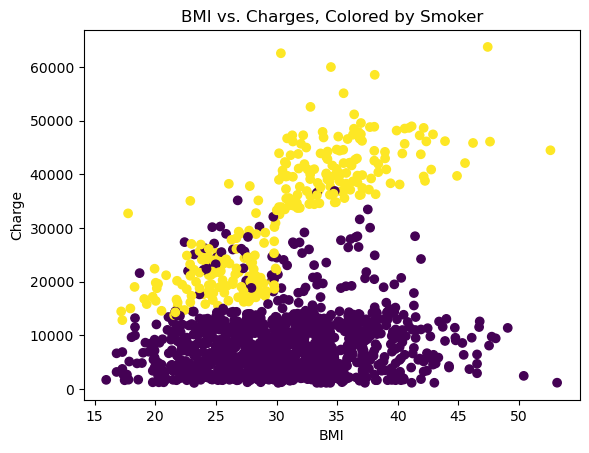

In [14]:
# Make a scatterplot of bmi vs charges, colored by smoker
fig,ax=plt.subplots()
ax.scatter(df['bmi'],df['charges'],c=df['smoker'])
ax.set(title='BMI vs. Charges, Colored by Smoker',ylabel='Charge',xlabel='BMI');

10b) What do you notice from the visualization? (There are many correct answers.)

- Your Answer:
  - `Smokers of the same BMI have a consistently higher charges.`

### 11\)  Linear Model Plot - Charges vs. BMI - Colored by Smoker



11a) Compare the relationship of bmi and charges for smokers and nonsmokers using seaborn's `lmplot` to calculate a separate trendline for Smokers vs. Non-Smokers.


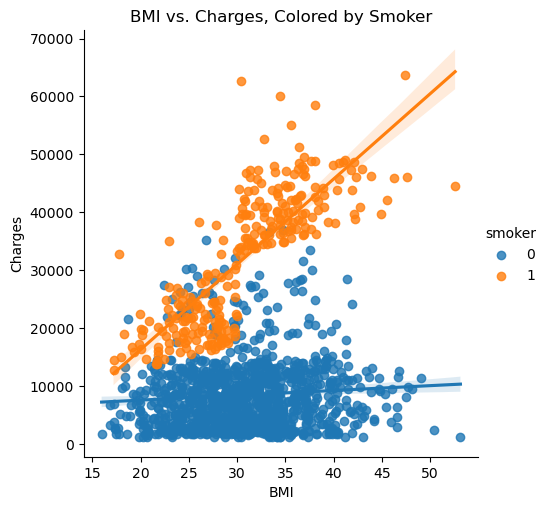

In [15]:
# Create an lmplot of bmi vs. charges, colored by smoker.
ax=sns.lmplot(data=df,x='bmi',y='charges',hue='smoker')
ax.set(title='BMI vs. Charges, Colored by Smoker',ylabel='Charges',xlabel='BMI');

11b) What do you notice from the visualization? (Compare the trendlines.)

- Your Answer:
  - `Non-smoker charges are more or less equal even as BMI increases, while smoker charges increases exponentially with BMI.`

## Explore Regions

### 12\) Countplot for Regions

12a) Make a countplot to show how many customers per region.

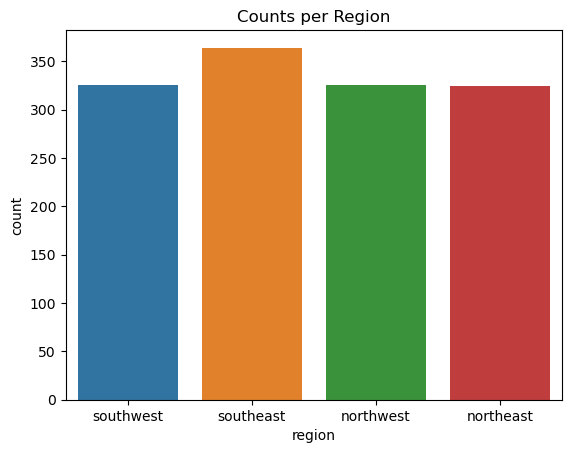

In [16]:
# Make a countplot for region
ax=sns.countplot(x=df['region'])
ax.set(title='Counts per Region');

12b) Which region appears the most in this data set?

- Your Answer:
  - `Southeast`

### 13\) Barplot of Charges by Region

13a) Make a barplot to show average charges by region.

In [17]:
# isolating region names 
region_index=df.groupby('region')['charges'].mean().index
# getting average charges by region
region_mean=df.groupby('region')['charges'].mean().values
display(region_index,region_mean)

Index(['northeast', 'northwest', 'southeast', 'southwest'], dtype='object', name='region')

array([13406.35493827, 12417.57846154, 14735.41483516, 12346.92923077])

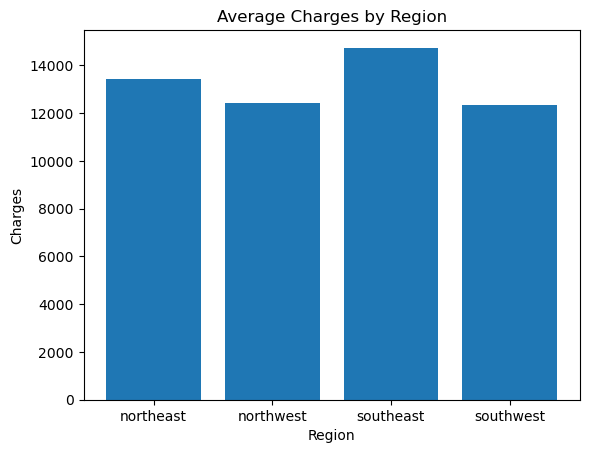

In [18]:
# make a barplot of charges by region
fig,ax=plt.subplots()
ax.bar(region_index,region_mean)
ax.set(title='Average Charges by Region',ylabel='Charges',xlabel='Region');

13b) Which region has the highest average charges?

- Your Answer:
  - `Southeast`

### 14\) Bar Chart of Ratios (%) of Smokers in Each Region

14a) Calculate the ratio of smokers in each region and save it as a variable called "percent_smoker_by_region". (Hint: use .groupby with "region" combined with slicing the "smoker" column and end with .mean() )

In [19]:
# use groupby to get the mean of smoker grouped by region
percent_smoker_by_region=df.groupby('region')['smoker'].mean()
percent_smoker_by_region

region
northeast    0.206790
northwest    0.178462
southeast    0.250000
southwest    0.178462
Name: smoker, dtype: float64

14b) Plot the ratios of smokers by region as a bar plot.



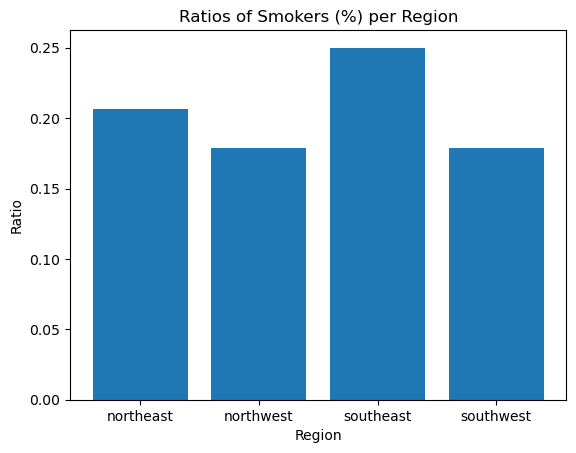

In [20]:
# Plot the ratios (the results of then groupby above)
fig,ax=plt.subplots()
ax.bar(percent_smoker_by_region.index,percent_smoker_by_region.values);
ax.set(title='Ratios of Smokers (%) per Region',xlabel='Region',ylabel='Ratio');

14c) Which region has the highest ratio of smokers?

- Your Answer:
  - `The Southeast`

> You've completed the assignment! Download your notebook and upload it as your submission.